### 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import eda_helper_functions
from sklearn.ensemble import IsolationForest

### 2. Reading the Training Data

In [3]:
file_path = r"D:\CampusX Projects\flights-price-prediction-project\data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,14:00:00,19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No Info,6152


### 2.1 Fixing the DataTypes

In [4]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:,col], dayfirst=True,format="mixed")
    for col in ["date_of_journey","dep_time","arrival_time"]
}
)

In [9]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [6]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,2024-05-10 08:55:00,2024-05-10 19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,2024-05-10 17:30:00,2024-05-10 04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,2024-05-10 11:40:00,2024-05-10 14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,2024-05-10 09:25:00,2024-05-10 18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,2024-05-10 22:55:00,2024-05-10 07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-10 10:45:00,2024-05-10 18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,2024-05-10 09:25:00,2024-05-10 18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,2024-05-10 14:00:00,2024-05-10 19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,2024-05-10 07:55:00,2024-05-10 13:25:00,330,1.0,No Info,6152


### 3. High Level Summary of Data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


#### High-level-summary
- There are total 10 columns in the train data.
- Only 1 missing value in `total_stops` column.

In [8]:
train.describe(include="number")

,duration,total_stops,price
count,6695.000000,6694.000000,6695.000000
mean,633.489171,0.801464,9030.965646
std,503.006311,0.659737,4639.522857
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,922.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [9]:
(
    train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include="O")
)

,airline,source,destination,total_stops,additional_info
count,6695,6695,6695,6694.0,6695
unique,9,5,6,4.0,7
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2391,2730,2730,3580.0,5249


### 4. High-level Analysis of Missing Values

In [10]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.014937


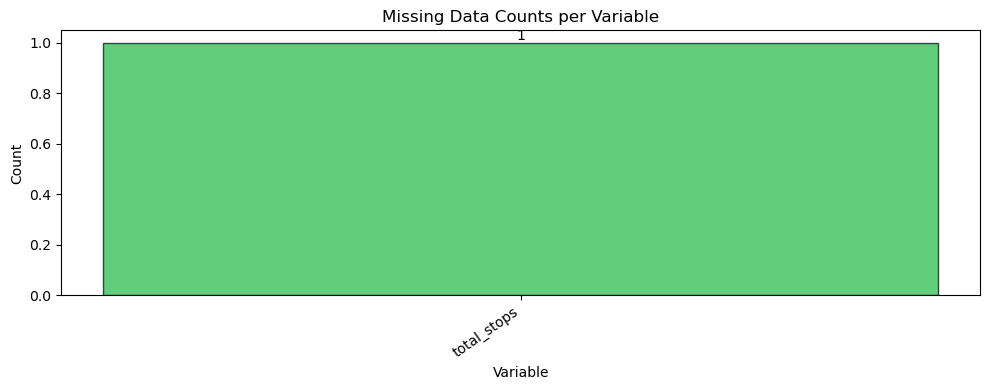

In [11]:
eda_helper_functions.plot_missing_info(train)

### 5. High Level Analysis of Outliers

In [12]:
train.isna().sum()

airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
total_stops        1
additional_info    0
price              0
dtype: int64

In [13]:
train = train.dropna()

In [14]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [15]:
(
    train
    .assign(
        outlier = forest.fit_predict(
            train
            .drop(columns="price")
            .select_dtypes(include="number")
        )
    )
    .query("outlier == -1")
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
5,Jet Airways,2019-04-21,Banglore,Delhi,2024-05-10 18:55:00,2024-05-10 22:00:00,185,0.0,In-flight meal not included,4544,-1
7,Spicejet,2019-06-15,Mumbai,Hyderabad,2024-05-10 05:45:00,2024-05-10 07:15:00,90,0.0,No check-in baggage included,2647,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,2024-05-10 23:05:00,2024-05-10 04:25:00,1760,2.0,No Info,15129,-1
10,Jet Airways,2019-06-12,Kolkata,Banglore,2024-05-10 14:05:00,2024-05-10 10:05:00,1200,1.0,No Info,13044,-1
12,Jet Airways,2019-06-24,Delhi,Cochin,2024-05-10 21:25:00,2024-05-10 19:00:00,1295,2.0,No Info,13292,-1
...,...,...,...,...,...,...,...,...,...,...,...
6687,Air India,2019-06-06,Kolkata,Banglore,2024-05-10 05:50:00,2024-05-10 08:55:00,1625,2.0,No Info,12723,-1
6688,Jet Airways,2019-06-15,Delhi,Cochin,2024-05-10 21:25:00,2024-05-10 12:35:00,910,2.0,In-flight meal not included,9905,-1
6689,Indigo,2019-03-03,Mumbai,Hyderabad,2024-05-10 09:10:00,2024-05-10 10:40:00,90,0.0,No Info,5755,-1
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-10 10:45:00,2024-05-10 18:50:00,1925,2.0,No Info,11093,-1


### 6.Pairplots

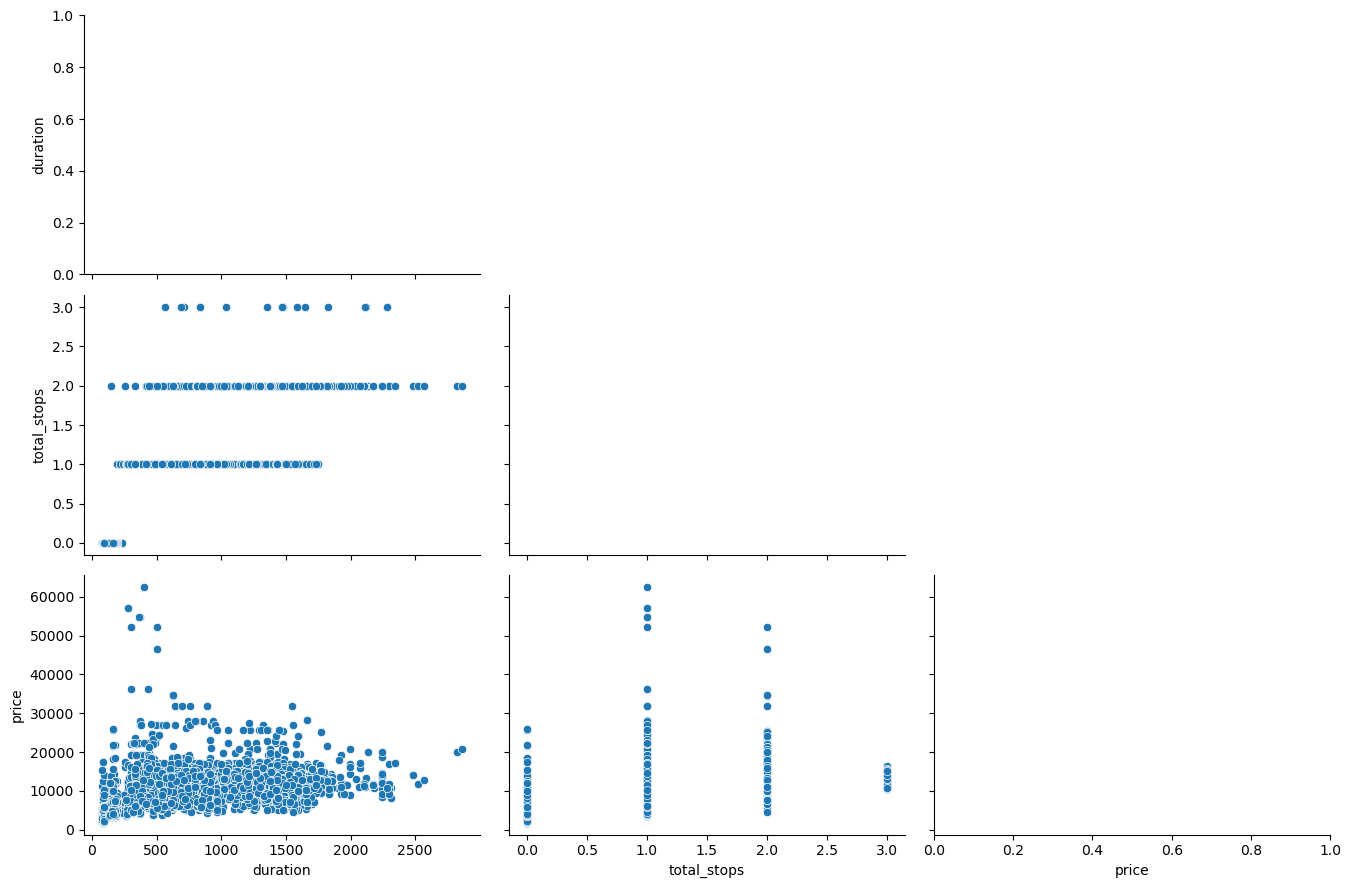

In [16]:
eda_helper_functions.pair_plots(train)

### 7. Correlation Analysis

<Axes: >

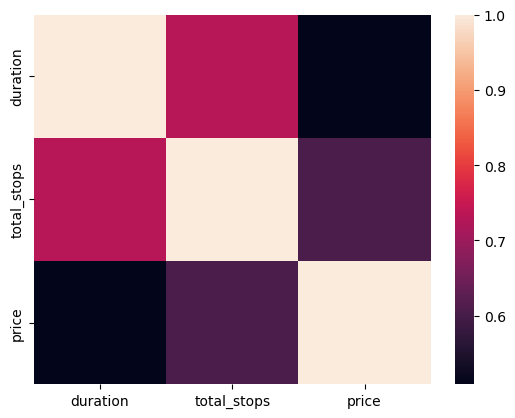

In [17]:
num_cols = train.select_dtypes(include='number')
sns.heatmap(num_cols.corr())

### 8. Detailed Analysis

In [18]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 airline

In [19]:
train.airline

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6694, dtype: object

In [20]:
eda_helper_functions.cat_summary(train,"airline")

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,9
top,Jet Airways
freq,2391


,count,percentage
category,,
Jet Airways,2391,0.357186
Indigo,1296,0.193606
Air India,1075,0.160592
Multiple Carriers,736,0.109949
Spicejet,537,0.080221
Vistara,322,0.048103
Air Asia,211,0.031521
Goair,125,0.018673
Trujet,1,0.000149


- There are Total 9 Categories in airline column.
- The categories are - `Jet Airways`,`Indigo`,`Air India`,`Multiple Carriers`,`Spicejet`,`Vistara`,`Air Asia`,`Goair`,`Trujet`.
- `Jet Airways` is the most frequent occured value in data (2391) and `Trujet` is the least occured value in data (1)

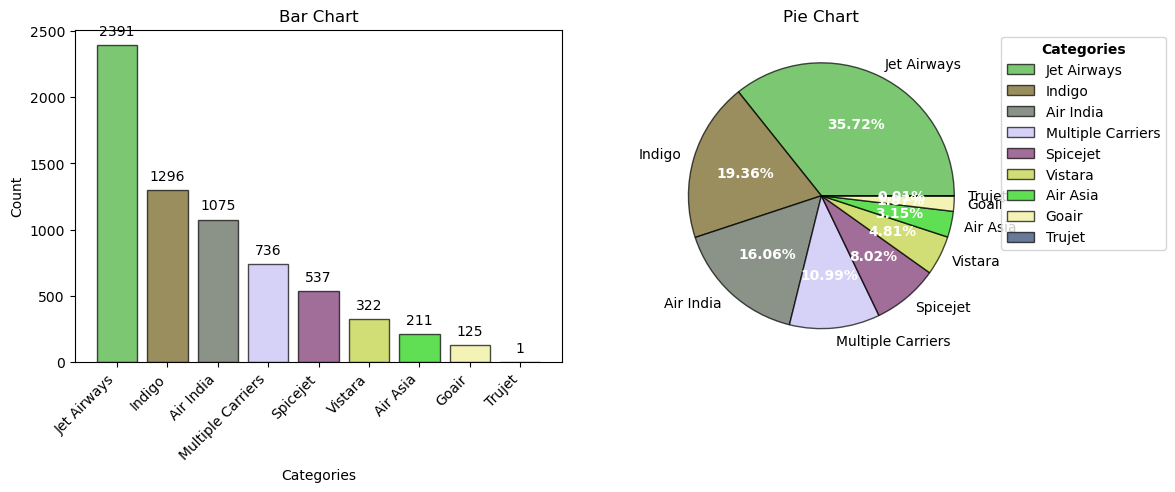

In [21]:
eda_helper_functions.cat_univar_plots(train,"airline", show_wordcloud=False)

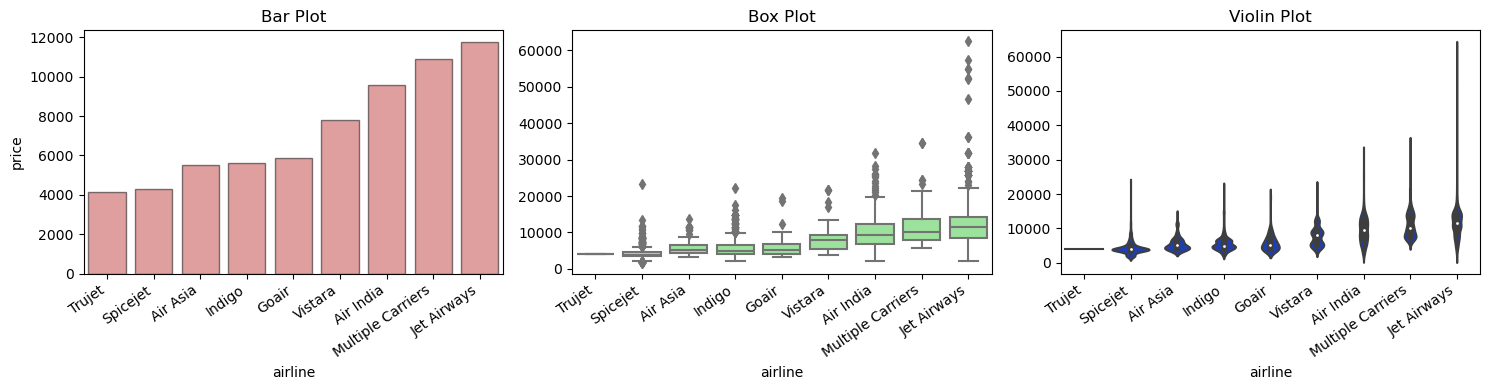

In [22]:
eda_helper_functions.num_cat_bivar_plots(data=train,
                                        num_var="price",
                                        cat_var = "airline")

In [23]:
eda_helper_functions.num_cat_hyp_testing(train,"price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 473.2504388077414
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3130.947388921903
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


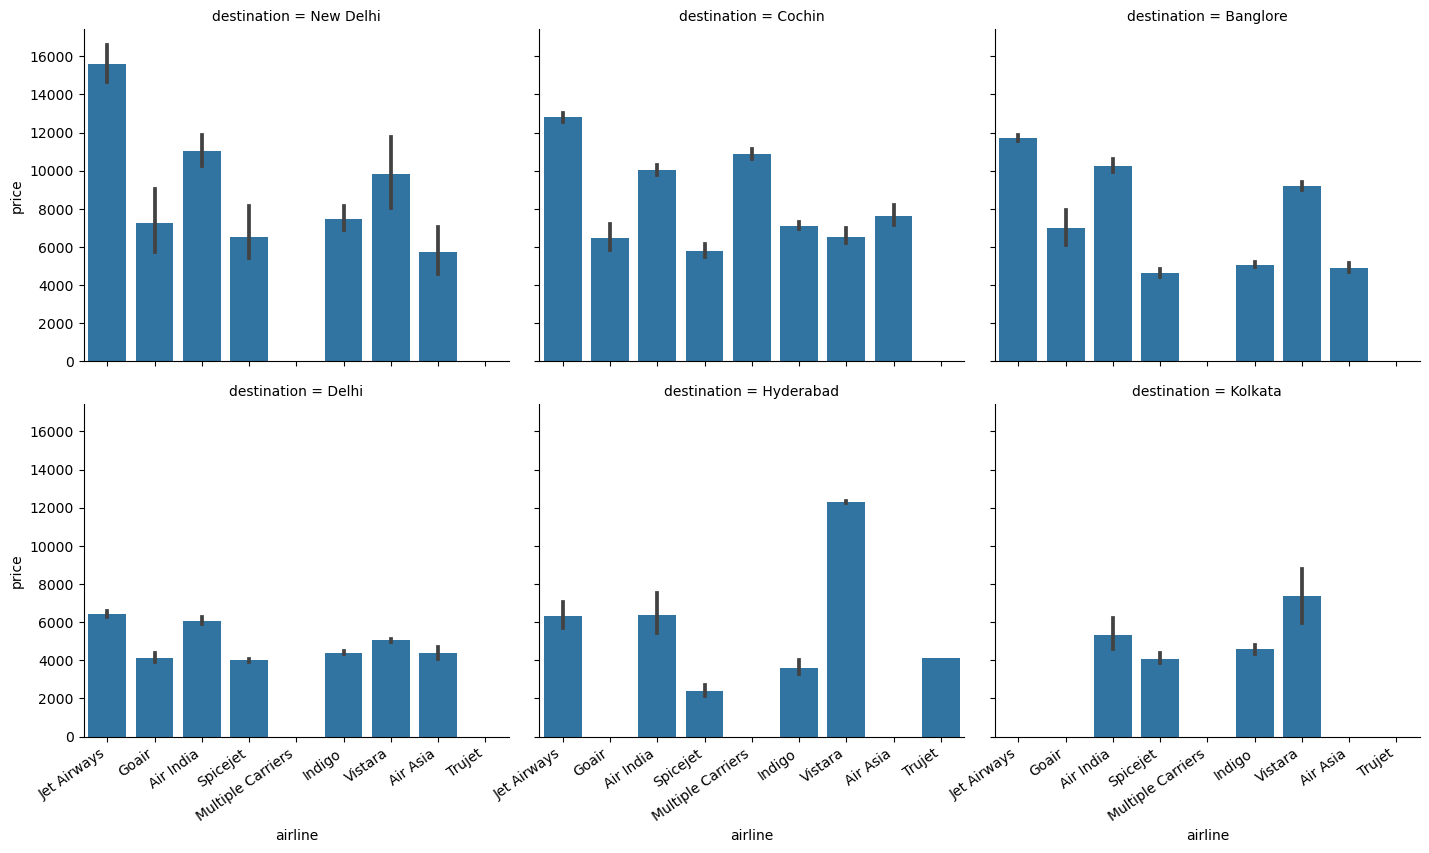

In [24]:
airline_grid = sns.FacetGrid(
    data=train,
    col = "destination",
    col_wrap=3,
    height = 4,
    aspect = 1.2,
    sharey = True
    
)

airline_grid.map(sns.barplot,"airline","price",order=train.airline.unique())
for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.2 date_of_journey

In [25]:
train.date_of_journey

0      2019-03-21
1      2019-03-27
2      2019-03-09
3      2019-06-12
4      2019-03-12
          ...    
6690   2019-03-21
6691   2019-05-01
6692   2019-06-01
6693   2019-06-24
6694   2019-03-01
Name: date_of_journey, Length: 6694, dtype: datetime64[ns]

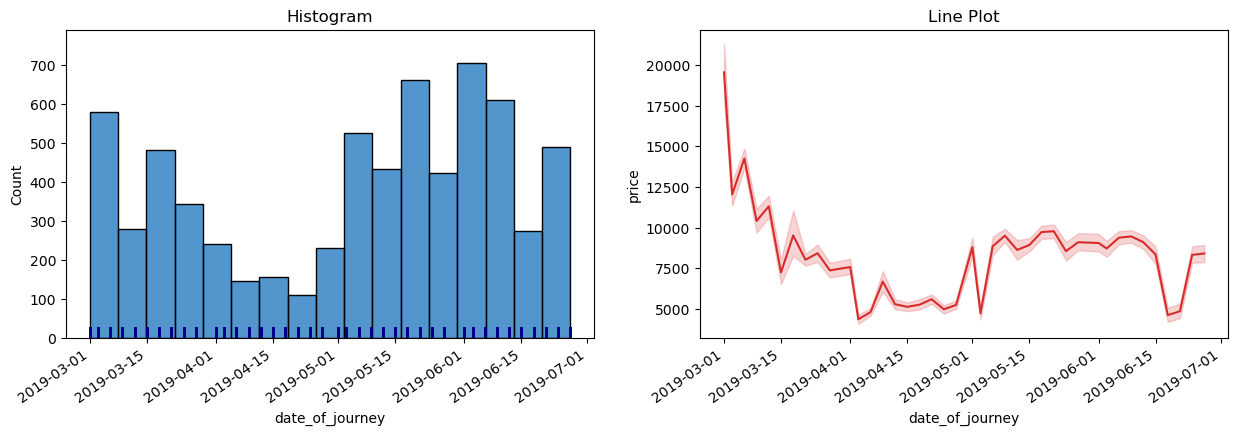

In [26]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var = "date_of_journey",
    target="price"
)

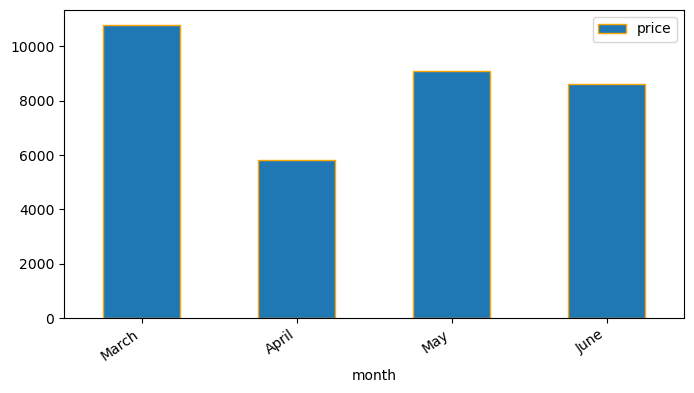

In [27]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor='orange'
       )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

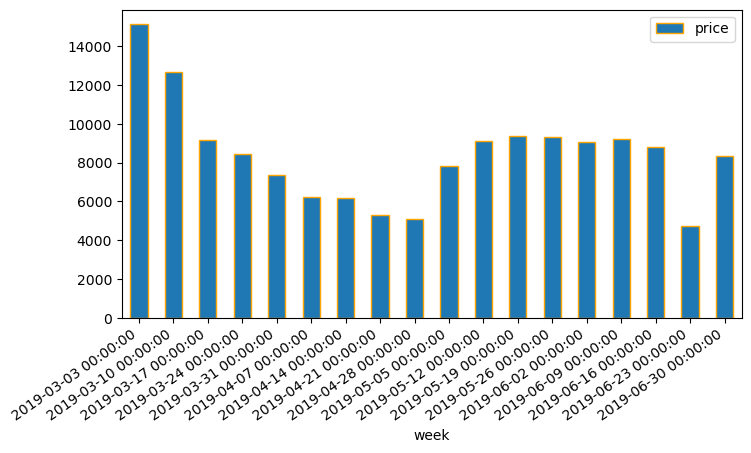

In [28]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="W"))
    .price.mean()
    .to_frame()
    .rename_axis(index="week")
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor='orange'
    )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

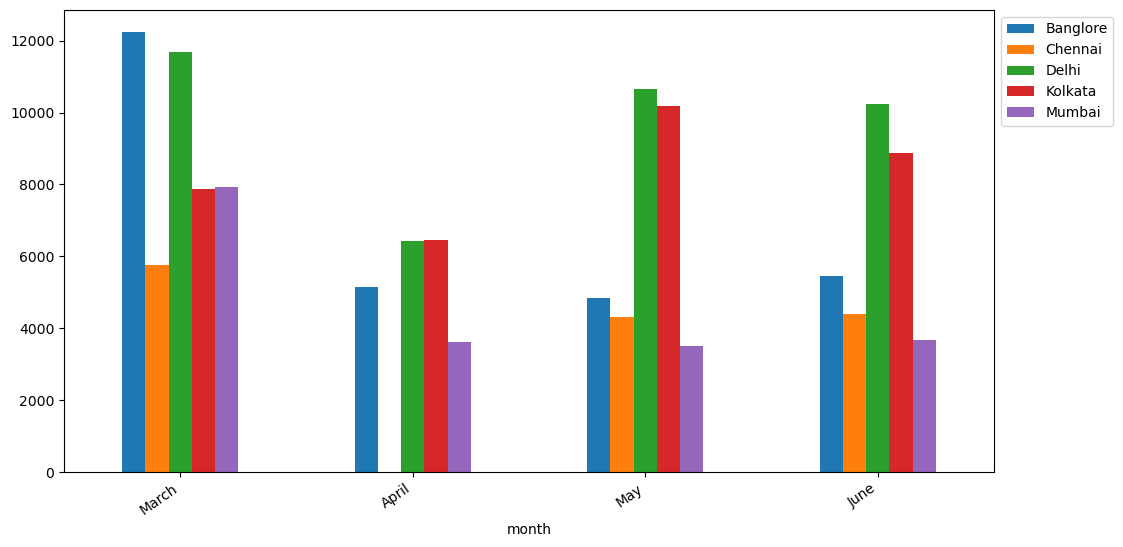

In [29]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March","April","May","June"],axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(12,6)
    )
)
ax = plt.gca()
ax.legend(
    loc="upper left",
    bbox_to_anchor = (1,1)
)
eda_helper_functions.rotate_xlabels(ax)

### 8.3 source

In [30]:
train.source

0       Banglore
1          Delhi
2       Banglore
3        Kolkata
4       Banglore
          ...   
6690       Delhi
6691     Kolkata
6692       Delhi
6693       Delhi
6694    Banglore
Name: source, Length: 6694, dtype: object

In [31]:
eda_helper_functions.cat_summary(train,"source")

0       Banglore
1          Delhi
2       Banglore
3        Kolkata
4       Banglore
          ...   
6690       Delhi
6691     Kolkata
6692       Delhi
6693       Delhi
6694    Banglore
Name: source, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,5
top,Delhi
freq,2729


,count,percentage
category,,
Delhi,2729,0.407679
Kolkata,1842,0.275172
Banglore,1435,0.214371
Mumbai,448,0.066926
Chennai,240,0.035853


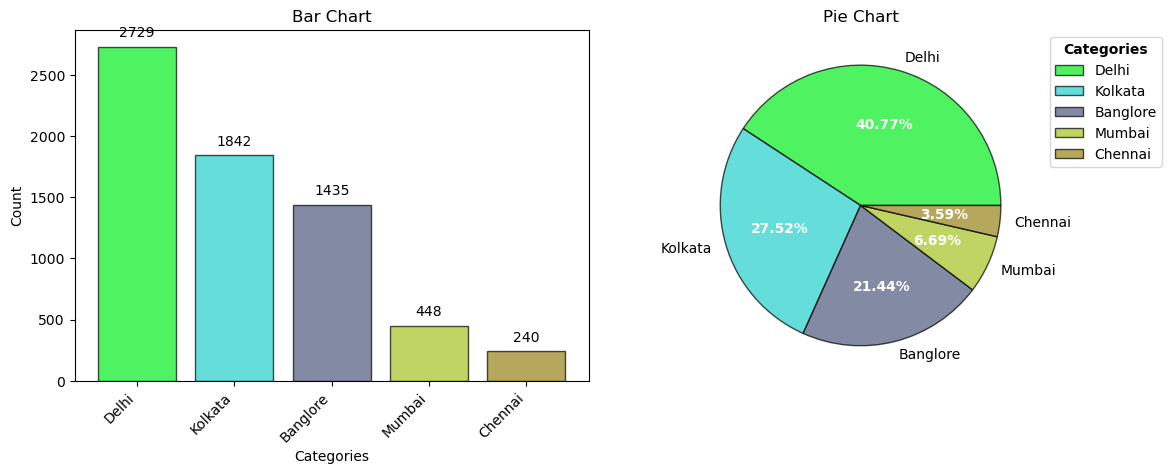

In [32]:
eda_helper_functions.cat_univar_plots(train,"source",show_wordcloud=False)

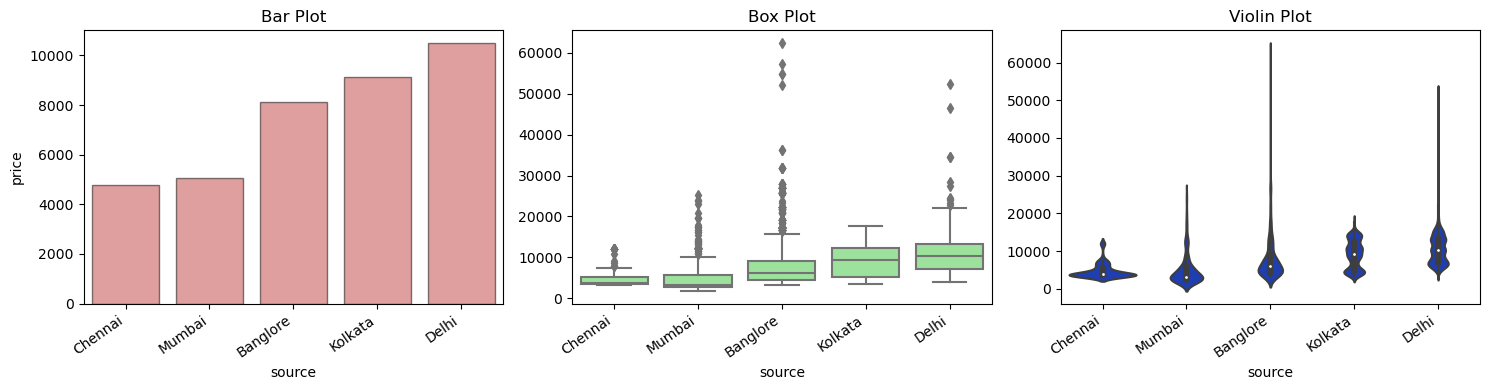

In [33]:
eda_helper_functions.num_cat_bivar_plots(train,
                                        num_var="price",
                                        cat_var="source")

In [34]:
eda_helper_functions.num_cat_hyp_testing(train,num_var="price",cat_var="source")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 244.58028823589046
- p-value              : 2.2961644028308123e-196
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and source are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 1425.4683818353044
- p-value              : 2.074962835494992e-307
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and source are associated to each other


### 8.4 destination

In [35]:
train.destination

0       New Delhi
1          Cochin
2       New Delhi
3        Banglore
4       New Delhi
          ...    
6690       Cochin
6691     Banglore
6692       Cochin
6693       Cochin
6694    New Delhi
Name: destination, Length: 6694, dtype: object

In [36]:
eda_helper_functions.cat_summary(train,"destination")

0       New Delhi
1          Cochin
2       New Delhi
3        Banglore
4       New Delhi
          ...    
6690       Cochin
6691     Banglore
6692       Cochin
6693       Cochin
6694    New Delhi
Name: destination, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 6 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,6
top,Cochin
freq,2729


,count,percentage
category,,
Cochin,2729,0.407679
Banglore,1842,0.275172
Delhi,836,0.124888
New Delhi,599,0.089483
Hyderabad,448,0.066926
Kolkata,240,0.035853


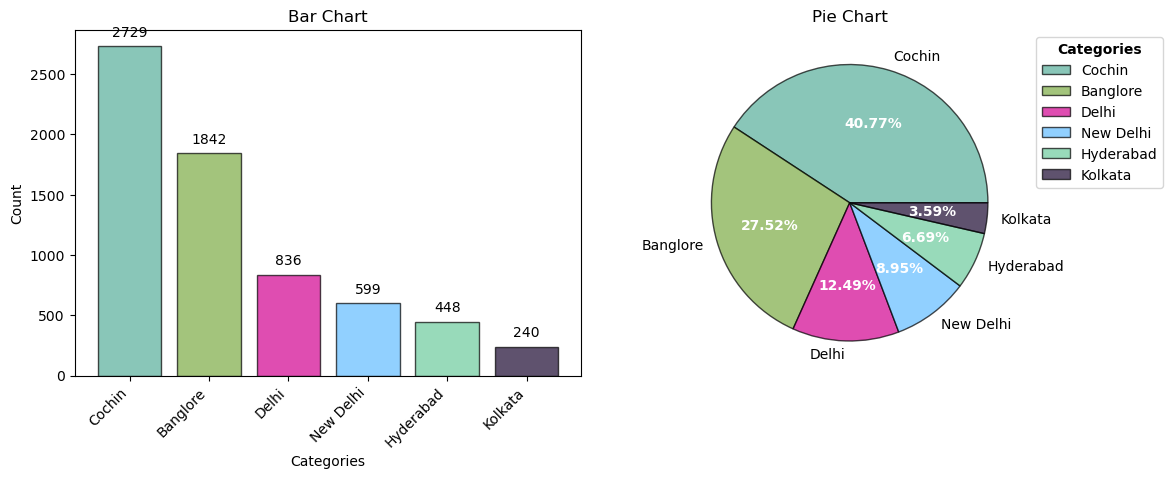

In [37]:
eda_helper_functions.cat_univar_plots(train,"destination",show_wordcloud=False)

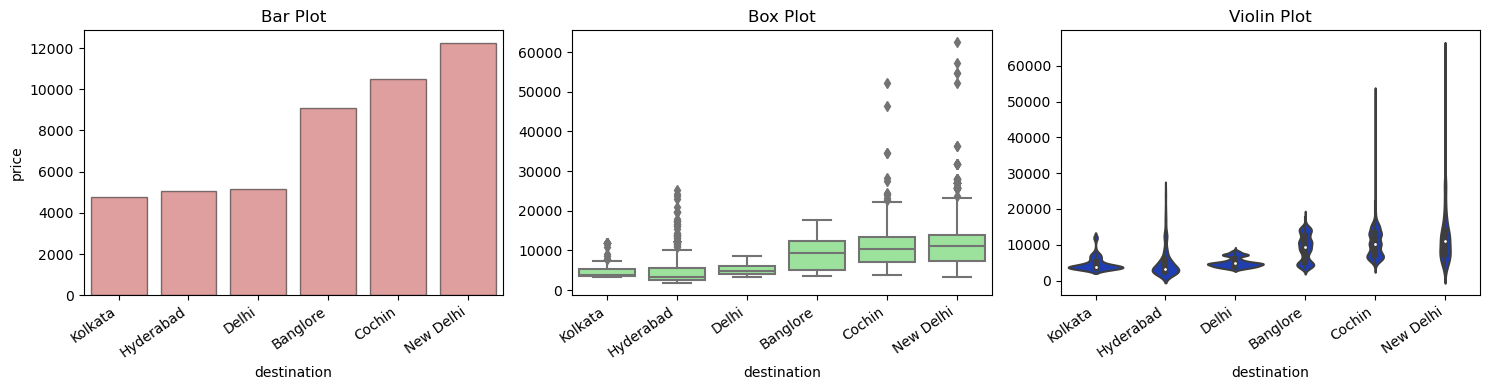

In [38]:
eda_helper_functions.num_cat_bivar_plots(train,num_var="price",cat_var="destination")

In [39]:
eda_helper_functions.num_cat_hyp_testing(train,num_var="price",cat_var="destination")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 444.8669549286331
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2144.6689744020605
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and destination are associated to each other


### 8.5 dep_time

In [40]:
train.dep_time

0      2024-05-10 08:55:00
1      2024-05-10 17:30:00
2      2024-05-10 11:40:00
3      2024-05-10 09:25:00
4      2024-05-10 22:55:00
               ...        
6690   2024-05-10 10:45:00
6691   2024-05-10 09:25:00
6692   2024-05-10 14:00:00
6693   2024-05-10 07:55:00
6694   2024-05-10 11:50:00
Name: dep_time, Length: 6694, dtype: datetime64[ns]

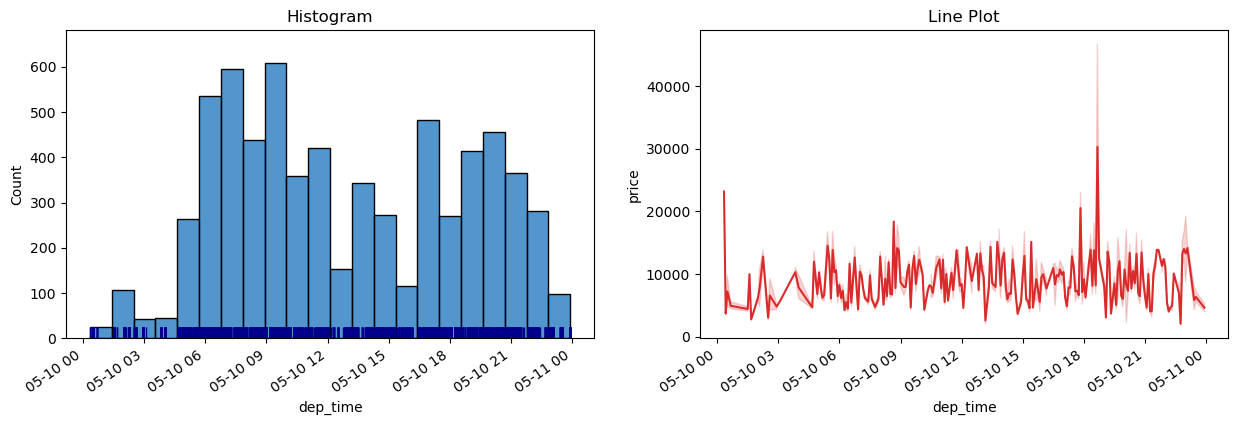

In [41]:
eda_helper_functions.dt_univar_plots(train, "dep_time","price")

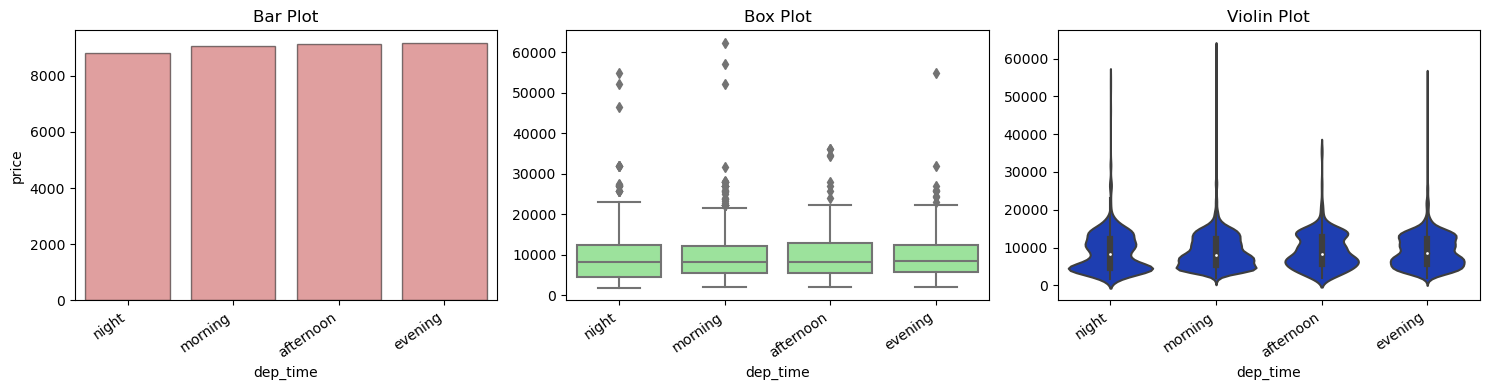

In [42]:
(
    train
    .assign(dep_time = lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4,12,inclusive="left"),
                  df_.dep_time.dt.hour.between(12,16,inclusive="left"),
                  df_.dep_time.dt.hour.between(16,20,inclusive="left")],
                  ["morning","afternoon","evening"],
                  default = "night")
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots,"price","dep_time")
)

### 8.6 duration

In [43]:
train.duration

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6694, dtype: int64

In [44]:
eda_helper_functions.num_summary(train,"duration")

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6694, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,510.00
75,920.00
90,1440.00
95,1601.75
99,1855.00


,value
mean,633.371676
trimmed mean (5%),599.575174
trimmed mean (10%),570.895258
median,510.000000


,value
var,252960.712875
std,502.951999
IQR,750.000000
mad,340.000000
coef_variance,0.794087


,value
skewness,0.894131
kurtosis,-0.052204


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 7.367044778597017e-57
Test Statistic       : 0.886539636636061
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 248.45769626661695
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [45]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.0
0.50    510.0
0.75    920.0
Name: duration, dtype: float64

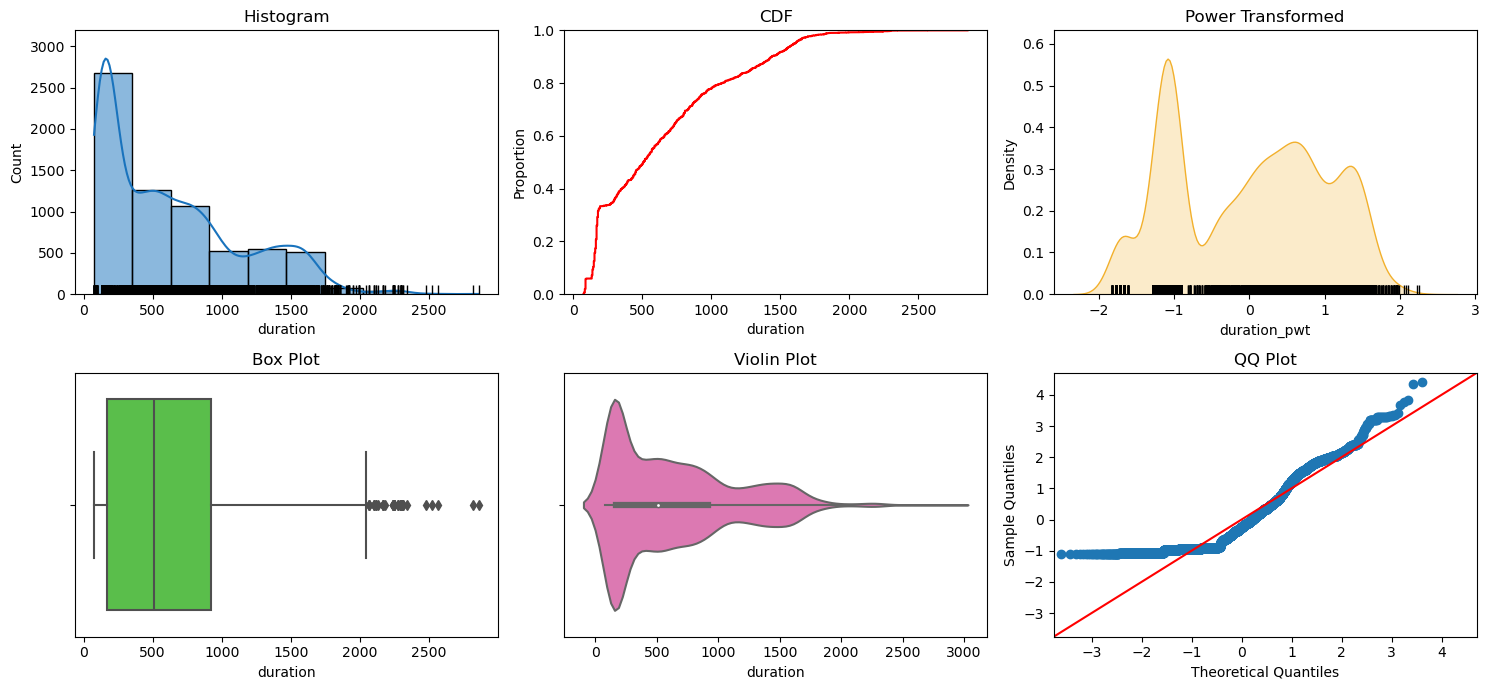

In [46]:
eda_helper_functions.num_univar_plots(train,"duration")

'Bi-variate Analysis between duration and price'

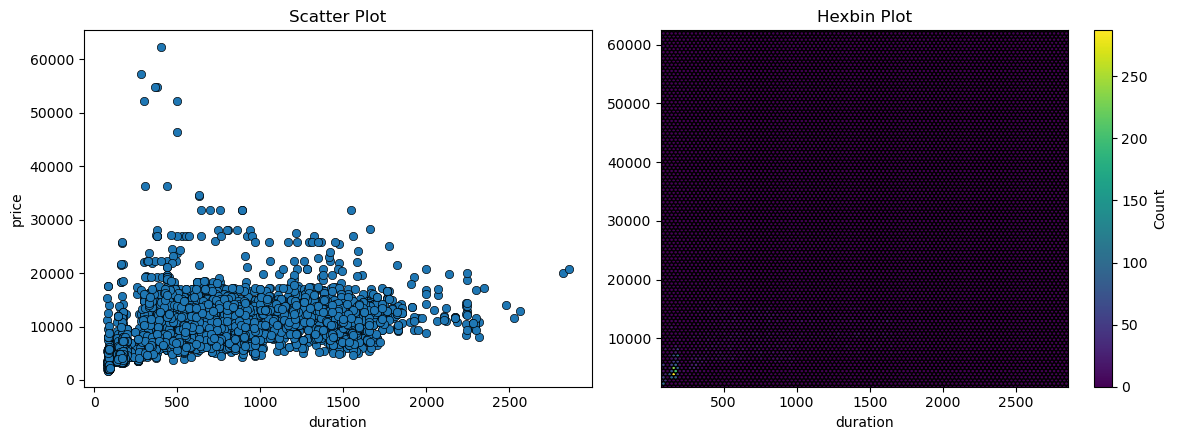

In [65]:
from IPython.display import display

def num_bivar_plots(data, var_x, var_y, figsize=(12, 4.5), scatter_kwargs=dict(), hexbin_kwargs=dict()):
    display(f"Bi-variate Analysis between {var_x} and {var_y}")
    display(content="")

    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # scatter plot
    sns.scatterplot(
        data=data,
        x=var_x,
        y=var_y,
        ax=axes[0],
        edgecolor="black",  
        **scatter_kwargs
    )
    axes[0].set(title="Scatter Plot")

    # hexbin plot
    col_x = data.loc[:, var_x]
    col_y = data.loc[:, var_y]
    hexbin = axes[1].hexbin(
        x=col_x,
        y=col_y,
        edgecolor="black", 
        **hexbin_kwargs
    )
    axes[1].set(
        title="Hexbin Plot",
        xlabel=var_x,
        xlim=(col_x.min(), col_x.max()),
        ylim=(col_y.min(), col_y.max())
    )
    cb = plt.colorbar(
        hexbin,
        ax=axes[1],  
        label="Count"
    )

    plt.tight_layout()
    plt.show()

num_bivar_plots(train,"duration","price")

TypeError: Got both 'edgecolor' and 'edgecolors', which are aliases of one another

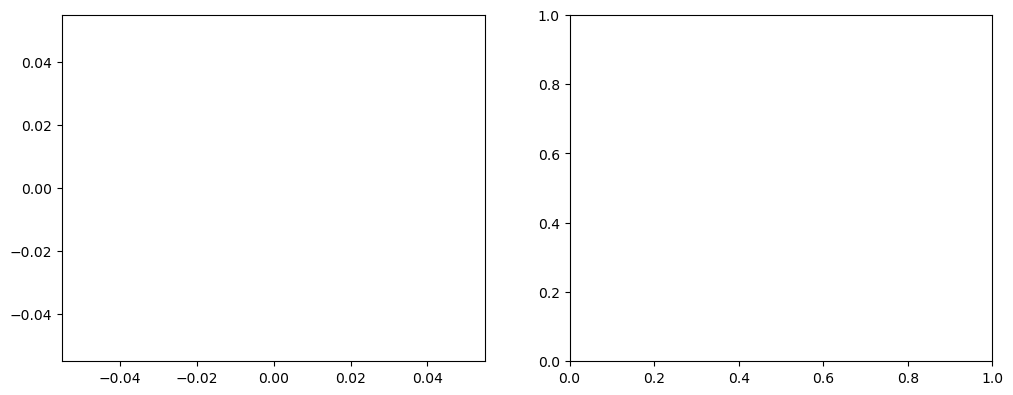

In [67]:
eda_helper_functions.num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs=dict(
        yscale="log",
        gridsize=20,
        cmap="Blues"
    )
)

In [49]:
eda_helper_functions.num_num_hyp_testing(train,"price","duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5091878071906606
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6980000420004595
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


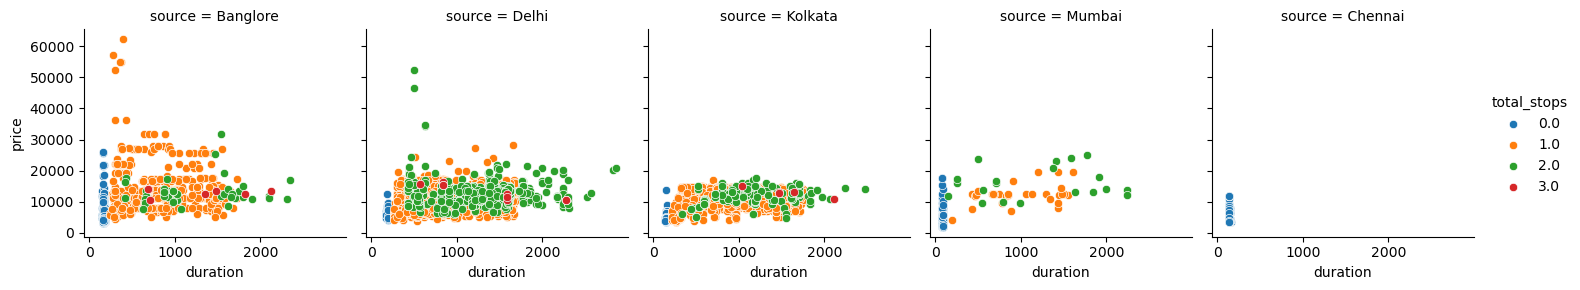

In [50]:
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [51]:
eda_helper_functions.get_iqr_outliers(train,"duration")

Lower Limit : -955.0
Upper Limit : 2045.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
3690,Air India,2019-05-01,Kolkata,Banglore,2024-05-10 05:50:00,2024-05-10 16:15:00,2065,2.0,No Info,10991
6079,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-10 17:55:00,2024-05-10 04:25:00,2070,2.0,No Info,17072
3225,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-10 17:55:00,2024-05-10 04:25:00,2070,2.0,In-flight meal not included,15812
2990,Air India,2019-03-03,Banglore,New Delhi,2024-05-10 11:05:00,2024-05-10 22:10:00,2105,2.0,No Info,11791
4589,Air India,2019-03-18,Banglore,New Delhi,2024-05-10 11:05:00,2024-05-10 22:10:00,2105,2.0,No Info,11161
1517,Air India,2019-03-03,Banglore,New Delhi,2024-05-10 11:05:00,2024-05-10 22:10:00,2105,2.0,No Info,11948
2916,Air India,2019-05-12,Kolkata,Banglore,2024-05-10 12:00:00,2024-05-10 23:15:00,2115,3.0,No Info,10991
2170,Air India,2019-03-12,Banglore,New Delhi,2024-05-10 06:45:00,2024-05-10 18:05:00,2120,3.0,No Info,13387
1105,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-10 16:50:00,2024-05-10 04:25:00,2135,2.0,No Info,19907
4000,Air India,2019-03-06,Delhi,Cochin,2024-05-10 07:05:00,2024-05-10 19:15:00,2170,2.0,No Info,11552


### 8.7 additional_info

In [52]:
train.additional_info

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6694, dtype: object

In [53]:
eda_helper_functions.cat_summary(train,"additional_info")

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,7
top,No Info
freq,5248


,count,percentage
category,,
No Info,5248,0.783986
In-flight meal not included,1215,0.181506
No check-in baggage included,207,0.030923
1 Long layover,16,0.002390
Change airports,5,0.000747
Business class,2,0.000299
Red-eye flight,1,0.000149


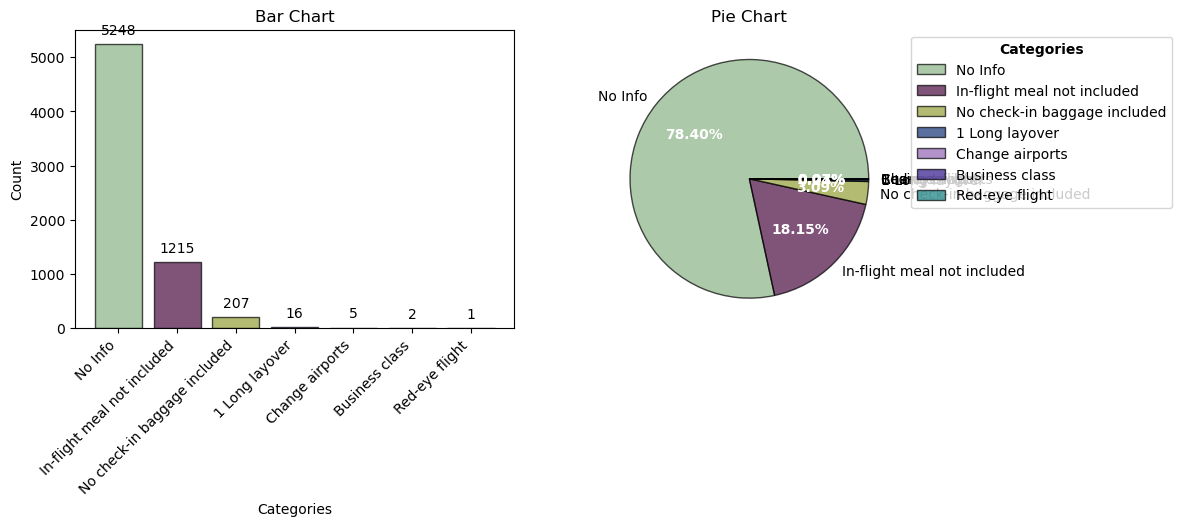

In [54]:
eda_helper_functions.cat_univar_plots(train,"additional_info",show_wordcloud=False)

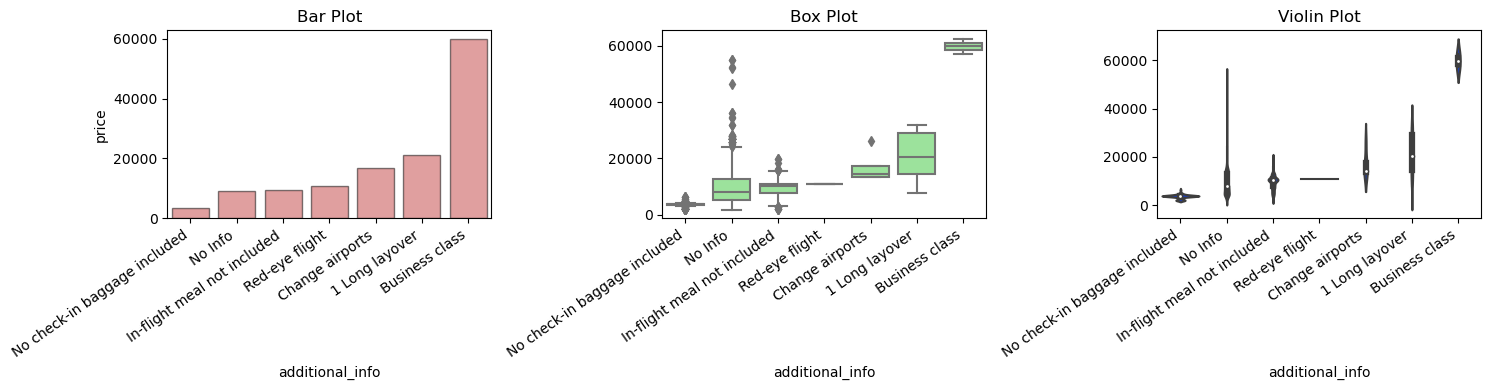

In [55]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")